In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('events_log.csv')

In [3]:
df.shape

(400165, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
uuid               400165 non-null object
timestamp          400165 non-null float64
session_id         400165 non-null object
group              400165 non-null object
action             400165 non-null object
checkin            223824 non-null float64
page_id            400165 non-null object
n_results          136234 non-null float64
result_position    230482 non-null float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


In [5]:
df.describe()

,timestamp,checkin,n_results,result_position
count,4.001650e+05,223824.000000,136234.000000,230482.000000
mean,2.016030e+13,97.190382,13.210109,2.992798
std,2.340996e+06,104.593714,13.271104,38.557292
min,2.016030e+13,10.000000,0.000000,1.000000
25%,2.016030e+13,20.000000,2.000000,1.000000
50%,2.016030e+13,50.000000,20.000000,1.000000
75%,2.016031e+13,150.000000,20.000000,2.000000
max,2.016031e+13,420.000000,500.000000,4103.000000


In [6]:
# Find duplicates
df[df.duplicated()]

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position


In [7]:
# Convert timestamp to datetime
df.timestamp =  pd.to_datetime(df.timestamp.astype('int64'), format='%Y%m%d%H%M%S', utc=True)

In [8]:
# Convert action and group to Category
df.action = df.action.astype('category')
df.group = df.group.astype('category')

In [9]:
# Convert session_id to categorical
df.session_id = df.session_id.astype('category')
df.page_id = df.page_id.astype('category')

In [10]:
# Daily Click Through Rate
df['day_of_week'] = df.timestamp.dt.day_name()

In [11]:
df['time'] = df.timestamp.dt.time

In [12]:
df['week'] = df.timestamp.dt.week

In [13]:
# Create Ordered Category for the Days
day_category_type = pd.api.types.CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [14]:
# Change Day of Week to Categorical Type
df['day_of_week'] = df.day_of_week.astype(day_category_type)

In [15]:
df['date'] = df.timestamp.dt.date

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 13 columns):
uuid               400165 non-null object
timestamp          400165 non-null datetime64[ns, UTC]
session_id         400165 non-null category
group              400165 non-null category
action             400165 non-null category
checkin            223824 non-null float64
page_id            400165 non-null category
n_results          136234 non-null float64
result_position    230482 non-null float64
day_of_week        400165 non-null category
time               400165 non-null object
week               400165 non-null int64
date               400165 non-null object
dtypes: category(5), datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 38.0+ MB


In [22]:
df.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,day_of_week,time,week,date
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42+00:00,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,Tuesday,10:38:42,9,2016-03-01
1,00000c69fe345268935463abbfa5d5b3,2016-03-07 00:52:26+00:00,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN,Monday,00:52:26,10,2016-03-07
2,00003bfdab715ee59077a3670331b787,2016-03-02 14:53:05+00:00,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN,Wednesday,14:53:05,9,2016-03-02
3,0000465cd7c35ad2bdeafec953e08c1a,2016-03-02 22:27:01+00:00,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0,Wednesday,22:27:01,9,2016-03-02
4,000050cbb4ef5b42b16c4d2cf69e6358,2016-03-02 09:50:23+00:00,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN,Wednesday,09:50:23,9,2016-03-02


### Computing and Visualizing the Daily Clickthrough Rate

For a given session we find the number of `action = 'visitPage'`  and divide by the total actions.

In [23]:
default_colour = sb.color_palette()[0]

In [26]:
# overall clickthrough rate
overall_clickthrough_rate = df.groupby('session_id')['action'].apply(lambda x: True if any(x == 'visitPage') else False ).mean()
print(overall_clickthrough_rate)

0.3888398894572823


In [27]:
# Compute the Sessions that have click through.
# clickthrough_sessions = df_session_grouped['action'].apply(lambda x: True if any(x == 'visitPage') else False ).reset_index(name='clickthrough')

,group,group_clickthrough_rate
0,a,0.669657
1,b,0.174762


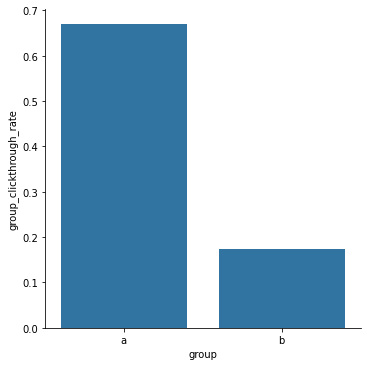

In [28]:
# Visualize Clickthrough Rate Per Group

# Categorize the data according to 'group' and 'session_id' and check the action for each session_id to find the ones which have at least one of the 'action' == 'visitPage'
# True if it meets the condition and False if it doesn't
# Calculate the clickthrough rate for each group, i.e the proportion of the sessions that were assigned 'True'
group_plot_data = df.groupby(['group','session_id'])['action'].apply(lambda x: True if any(x == 'visitPage') else False).reset_index(name="group_clickthrough_rate").groupby('group').mean().reset_index()

# Plot the Result
sb.catplot(data=group_plot_data, x='group', y="group_clickthrough_rate", kind="bar", color=default_colour);

# Print Results
group_plot_data

,day_of_week,daily_clickthrough_rate
1,Monday,0.392562
5,Tuesday,0.384004
6,Wednesday,0.390884
4,Thursday,0.387476
0,Friday,0.398279
2,Saturday,0.381751
3,Sunday,0.388177


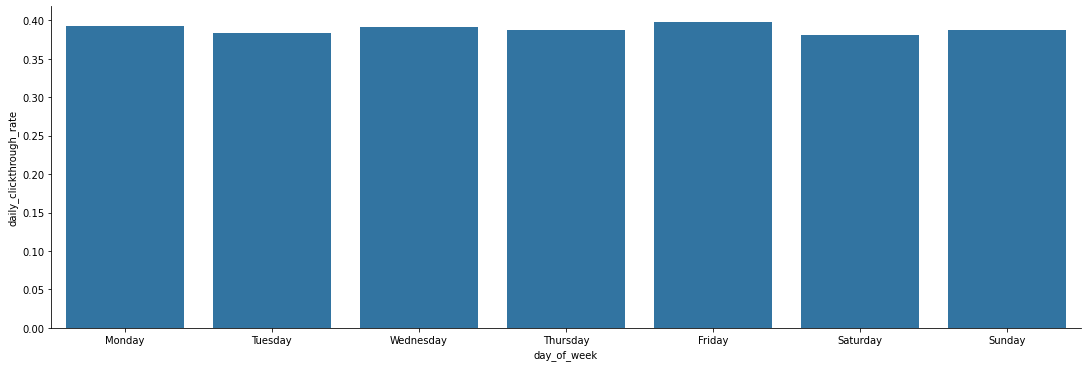

In [29]:
# Visualize Daily Clickthrough Rate

# Categorize the data according to 'day_of_week' and 'session_id' and check the action for each session_id to find the ones which have at least one of the 'action' == 'visitPage'
# True if it meets the condition and False if it doesn't
# Calculate the clickthrough rate for each day_of_week, i.e the proportion of the sessions that were assigned 'True'
daily_plot_data = df.groupby(['day_of_week','session_id'])['action'].apply(lambda x: True if any(x == 'visitPage') else False).reset_index(name="daily_clickthrough_rate").groupby('day_of_week').mean().reset_index()

# Change day_of_week in the results to ordered categorical type - Monday to Sunday
daily_plot_data['day_of_week'] = daily_plot_data['day_of_week'].astype(day_category_type)

# Plot the Result
sb.catplot(data=daily_plot_data, x='day_of_week', y="daily_clickthrough_rate", kind="bar", color=default_colour, aspect=3);

# Print Results
daily_plot_data.sort_values('day_of_week')

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
group,,,,,,,
a,0.656746,0.668151,0.681269,0.675374,0.675583,0.644973,0.672820
b,0.199347,0.160889,0.145232,0.151933,0.192657,0.201998,0.189609


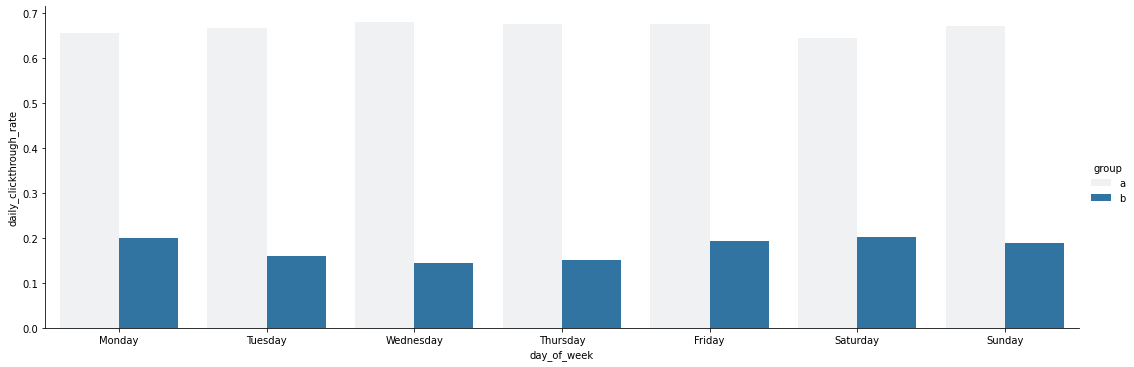

In [30]:
# Visualize Daily Clickthrough Rate Per Group

# Categorize the data according to 'day_of_week','session_id', and 'group' and check the action for each session_id to find the ones which have at least one of the 'action' == 'visitPage'
# True if it meets the condition and False if it doesn't
# Calculate the clickthrough rate for each day_of_week, i.e the proportion of the sessions that were assigned 'True'
bivariate_clickthrough_data = df.groupby(['group','day_of_week','session_id'])['action'].apply(lambda x: True if any(x == 'visitPage') else False
                                                                                  ).reset_index(name="daily_clickthrough_rate").groupby(['group','day_of_week']).mean().reset_index()

# Change day_of_week in the results to ordered categorical type - Monday to Sunday
bivariate_clickthrough_data['day_of_week'] = bivariate_clickthrough_data['day_of_week'].astype(day_category_type)

# Plot the Result
sb.catplot(data=bivariate_clickthrough_data, x='day_of_week', y="daily_clickthrough_rate", hue="group", kind="bar", color=default_colour, aspect=3);

# Print Results
pd.pivot_table(bivariate_clickthrough_data, columns='day_of_week', index='group', values='daily_clickthrough_rate')

In [31]:
pd.pivot_table(bivariate_clickthrough_data, columns='day_of_week', index='group', values='daily_clickthrough_rate')

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
group,,,,,,,
a,0.656746,0.668151,0.681269,0.675374,0.675583,0.644973,0.672820
b,0.199347,0.160889,0.145232,0.151933,0.192657,0.201998,0.189609


## **Zero Result Rates**

In [32]:
serp_df = df.query('action == "searchResultPage"')
serp_df['is_zero_result'] = serp_df.apply(lambda x: True if (x.n_results == 0) else False , axis=1)
serp_df.head()

/home/mupati/.virtualenvs/azure-ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,day_of_week,time,week,date,is_zero_result
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42+00:00,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,Tuesday,10:38:42,9,2016-03-01,False
1,00000c69fe345268935463abbfa5d5b3,2016-03-07 00:52:26+00:00,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN,Monday,00:52:26,10,2016-03-07,False
7,000104fe220a5675a270420cd6d4d4ac,2016-03-02 01:28:45+00:00,485eabe5374f09e4,b,searchResultPage,NaN,4da9a64232ce947b,15.0,NaN,Wednesday,01:28:45,9,2016-03-02,False
10,00015c90c82354fba4a40a832a67bb76,2016-03-07 14:07:07+00:00,9822d8a8dc66a02b,a,searchResultPage,NaN,0f58bcfc65454f23,20.0,NaN,Monday,14:07:07,10,2016-03-07,False
12,0001e32066ce5aceafc0c16c4bdf7cab,2016-03-05 04:18:04+00:00,58ebf0bc66ff11a6,a,searchResultPage,NaN,e80fe6b7a68c4f98,9.0,NaN,Saturday,04:18:04,9,2016-03-05,False


In [33]:
# Overall Zero Results Rate
overall_zero_results_rate = np.mean(serp_df.is_zero_result)
print(overall_zero_results_rate)

0.18444000763392399


  group  zero_results_rate
0     a           0.183606
1     b           0.186179


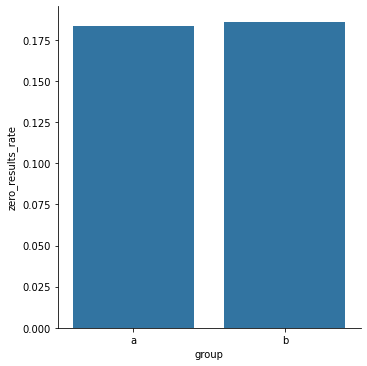

In [34]:
# Zero Results Rate Rate Per Group
group_zero_results_rate =  serp_df.groupby('group').mean()['is_zero_result'].reset_index(name="zero_results_rate")
print(group_zero_results_rate)
sb.catplot(data=group_zero_results_rate, x='group', y="zero_results_rate", kind="bar", color=default_colour);

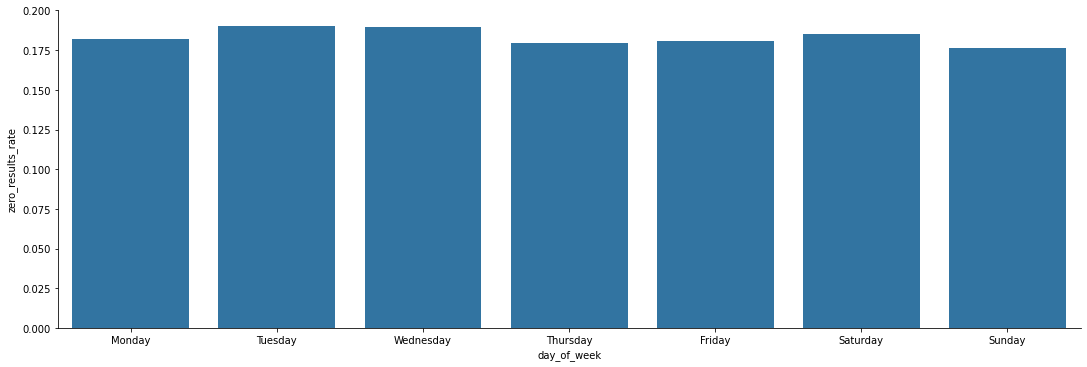

In [35]:
daily_zero_results_rate = serp_df.groupby(['day_of_week']).mean()['is_zero_result'].reset_index(name="zero_results_rate")
sb.catplot(data=daily_zero_results_rate, x='day_of_week', y="zero_results_rate", kind="bar", color=default_colour, aspect=3);

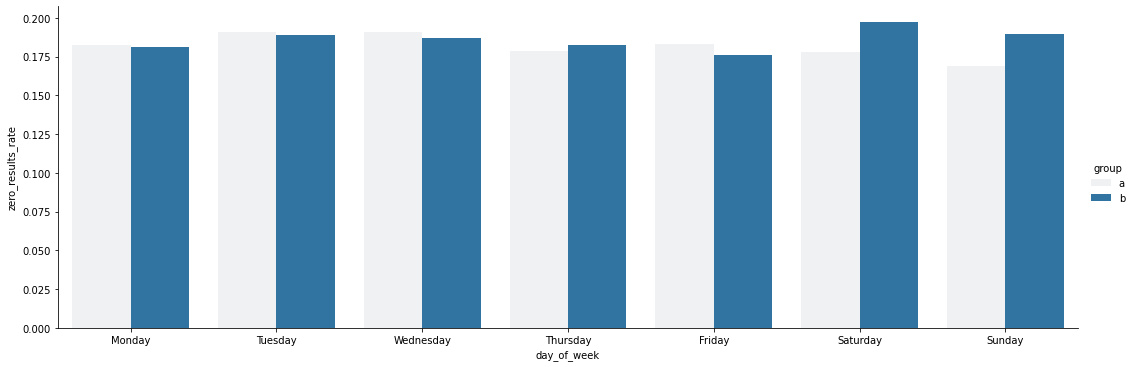

In [36]:
# Zero Results Rate using Day and Group
daily_zero_results_group = serp_df.groupby(['group','day_of_week']).mean()['is_zero_result'].reset_index(name="zero_results_rate")
sb.catplot(data=daily_zero_results_group, x='day_of_week', y="zero_results_rate", hue="group", kind="bar", color=default_colour, aspect=3);

## Which Result do people tend to choose first

In [37]:
# Find the Results that were clicked and have an assigned position number
clicked_results_with_position = df.query('action == "visitPage" and result_position.notna()')

In [38]:
# Convert the result position number to int.
clicked_results_with_position.result_position = clicked_results_with_position.result_position.astype('int64')

/home/mupati/.virtualenvs/azure-ml/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
clicked_results_with_position.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34079 entries, 21 to 400141
Data columns (total 13 columns):
uuid               34079 non-null object
timestamp          34079 non-null datetime64[ns, UTC]
session_id         34079 non-null category
group              34079 non-null category
action             34079 non-null category
checkin            0 non-null float64
page_id            34079 non-null category
n_results          0 non-null float64
result_position    34079 non-null int64
day_of_week        34079 non-null category
time               34079 non-null object
week               34079 non-null int64
date               34079 non-null object
dtypes: category(5), datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 12.1+ MB


In [40]:
# For each session, choose the one that was clicked first.
grouped_session = clicked_results_with_position.groupby('session_id')

In [42]:
plot_data = grouped_session[['timestamp', 'result_position','day_of_week','date']].apply(lambda g: g[g['timestamp'] == g['timestamp'].min()]).reset_index()

In [43]:
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26450 entries, 0 to 26449
Data columns (total 6 columns):
session_id         26450 non-null category
level_1            26450 non-null int64
timestamp          26450 non-null datetime64[ns, UTC]
result_position    26450 non-null int64
day_of_week        26450 non-null category
date               26450 non-null object
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 4.0+ MB


In [44]:
# Get results with position <= 20
plot_data = plot_data.query('result_position <= 20')

In [45]:
plot_data.describe()

,level_1,result_position
count,26386.000000,26386.000000
mean,200543.075267,2.047184
std,115624.986431,2.488467
min,57.000000,1.000000
25%,100320.500000,1.000000
50%,201792.000000,1.000000
75%,300103.500000,2.000000
max,400141.000000,20.000000


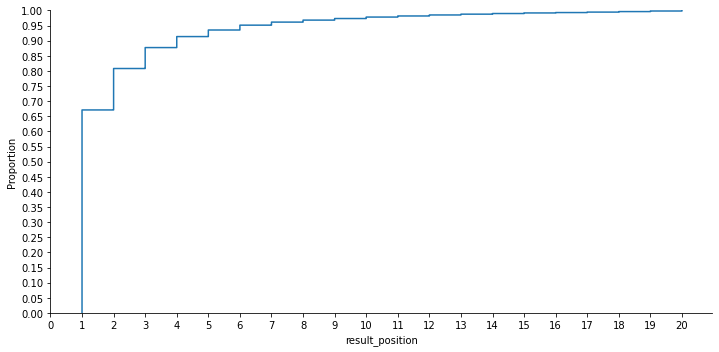

In [46]:
sb.displot(data=plot_data, x="result_position", kind="ecdf", aspect=2);
plt.xticks(np.arange(0,21,1));
plt.yticks(np.arange(0,1.05,0.05));

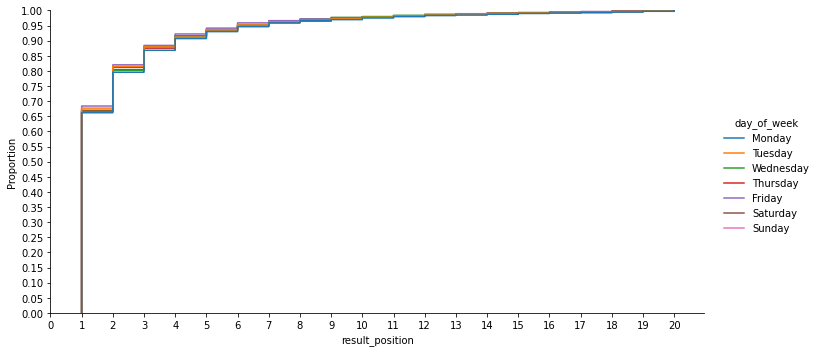

In [47]:
sb.displot(data=plot_data, x="result_position", kind="ecdf", aspect=2, hue="day_of_week");
plt.xticks(np.arange(0,21,1));
plt.yticks(np.arange(0,1.05,0.05));

# Relationship Between Session duration and Clickthrough Event

In [48]:
def get_session_duration(timestamp):
    return pd.Timedelta(max(timestamp) - min(timestamp)).seconds

In [49]:
session_duration_df = df.groupby('session_id')['timestamp'].agg(get_session_duration).reset_index(name="session_duration")

In [50]:
session_duration_df.head()

,session_id,session_duration
0,0000cbcb67c19c45,0
1,0001382e027b2ea4,303
2,0001e8bb90445cb2,435
3,000216cf18ae1ab1,58
4,000527f711d50dfc,0


In [51]:
session_duration_df.shape

(68028, 2)

In [52]:
# Group df by session
df_session_grouped = df.groupby('session_id')

In [53]:
# Compute the Sessions that have click through.
clickthrough_sessions = df_session_grouped['action'].apply(lambda x: True if any(x == 'visitPage') else False ).reset_index(name='clickthrough')

In [54]:
clickthrough_sessions.shape

(68028, 2)

In [55]:
clickthrough_sessions.head()

,session_id,clickthrough
0,0000cbcb67c19c45,False
1,0001382e027b2ea4,True
2,0001e8bb90445cb2,True
3,000216cf18ae1ab1,False
4,000527f711d50dfc,False


In [56]:
clickthrough_session_duration = pd.merge(session_duration_df, clickthrough_sessions, on="session_id")
clickthrough_session_duration.shape

(68028, 3)

In [57]:
clickthrough_session_duration.head()

,session_id,session_duration,clickthrough
0,0000cbcb67c19c45,0,False
1,0001382e027b2ea4,303,True
2,0001e8bb90445cb2,435,True
3,000216cf18ae1ab1,58,False
4,000527f711d50dfc,0,False


In [58]:
clickthrough_session_duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68028 entries, 0 to 68027
Data columns (total 3 columns):
session_id          68028 non-null category
session_duration    68028 non-null int64
clickthrough        68028 non-null bool
dtypes: bool(1), category(1), int64(1)
memory usage: 4.4 MB


In [59]:
clickthrough_session_duration.describe()

,session_duration
count,68028.000000
mean,145.911419
std,955.902202
min,0.000000
25%,0.000000
50%,15.000000
75%,138.000000
max,80293.000000


In [60]:
clickthrough_session_duration['clickthrough'] = clickthrough_session_duration['clickthrough'].replace({True: 'Yes', False: 'No'}).astype('category')

In [61]:
clickthrough_session_duration.head()

,session_id,session_duration,clickthrough
0,0000cbcb67c19c45,0,No
1,0001382e027b2ea4,303,Yes
2,0001e8bb90445cb2,435,Yes
3,000216cf18ae1ab1,58,No
4,000527f711d50dfc,0,No


In [62]:
clickthrough_session_duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68028 entries, 0 to 68027
Data columns (total 3 columns):
session_id          68028 non-null category
session_duration    68028 non-null int64
clickthrough        68028 non-null category
dtypes: category(2), int64(1)
memory usage: 4.4 MB


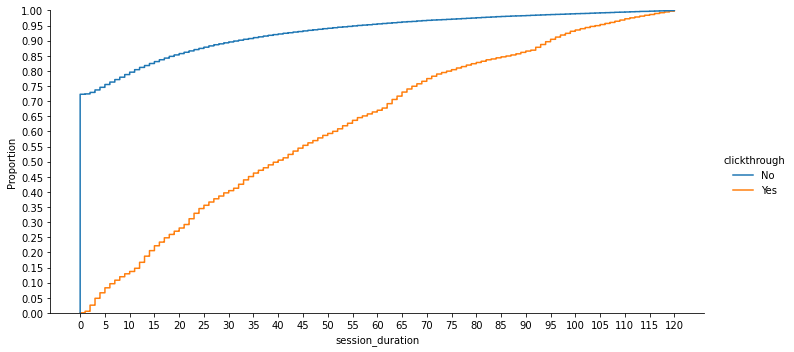

In [63]:
# Plot ECDF for session duration <= 2 minutes == 120s
two_minute_session = clickthrough_session_duration.query('session_duration <= 120')
sb.displot(data=two_minute_session, x="session_duration", kind="ecdf", hue="clickthrough", aspect=2);
plt.xticks(np.arange(0,125,5));
plt.yticks(np.arange(0,1.05,0.05));

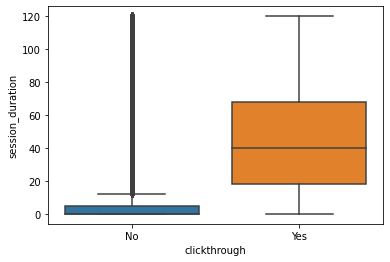

In [64]:
# Session Duration per Clickthrough or Not
sb.boxplot(x="clickthrough", y="session_duration", data=two_minute_session);